In [1]:
"""
================================
Nearest Neighbors Classification
================================

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.
"""
print(__doc__)

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


n_neighbors = 9
CSV_PATH = 'data/1.csv'

# Data import into dataframe
X = pd.read_csv(CSV_PATH,header=None,delimiter=',',usecols=[1, 2, 3])

X.head()


Nearest Neighbors Classification

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.



AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [188]:
X.shape

(162501, 3)

In [189]:
X.describe()

[1 1 1 ... 7 7 0]


In [190]:
clf = neighbors.KNeighborsClassifier(n_neighbors) # je précise la méthode et ses hyperparamètres
clf.fit(X, y) # je lance l'apprentissage

KNeighborsClassifier(n_neighbors=9)

In [191]:
# Si on est en régresssion..
#clf = neighbors.KNeighborsRegressor(n_neighbors=) # je précise la méthode et ses hyperparamètres


In [192]:
# prevision
clf.predict(X)

array([1, 1, 1, ..., 7, 7, 7])

In [193]:
clf.score(X,y) # predit + calcul le score = la précision

0.8667085125629996

In [194]:
import random
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=random.seed())
print(X_train.shape)
print(X_test.shape)


(113750, 3)
(48751, 3)


In [195]:
n_neighbors=9
clf = neighbors.KNeighborsClassifier(n_neighbors) # je précise la méthode et ses hyperparamètres
clf.fit(X_train, Y_train) # je lance l'apprentissage
prev_test = clf.predict(X_test)
sc_train = clf.score(X_train,Y_train)
sc_test = clf.score(X_test,Y_test)
print(sc_train)
print(sc_test)


0.8669274725274725
0.8524953334290578


In [196]:
# Compute the confusion matrix between kmean label and iris types
from sklearn.metrics import confusion_matrix

cmat=confusion_matrix(Y_test,prev_test)
# the confusion matrix is difficult to read as labels assigned by kmeans are arbitrary
print(cmat)

[[ 9762     3     6   144    14     2   169]
 [   14    28    10   127     6     1    89]
 [   12     2  1131   230    30    11  1896]
 [  178    10   100  6797   141    19   804]
 [   36     1     6   456   296     4   138]
 [   10     0    46   587    24    29   181]
 [  220    19   662   740    20    23 23517]]


In [197]:
# Pour voir l'effet du partage ...

from sklearn.model_selection import KFold
kf=KFold(n_splits=4, shuffle=True) # partages de validation
XXX = X_train[:12,:]  # je prends uniquement les 12 premières lignes
#print(XXX)
for learn,test in kf.split(XXX): # boucle sur différents partages de validation
  print("Learn")
  print(learn)
  print("test")
  print(test)

Learn
[ 0  1  3  4  6  7  9 10 11]
test
[2 5 8]
Learn
[ 0  1  2  3  4  5  7  8 10]
test
[ 6  9 11]
Learn
[ 0  2  3  5  6  7  8  9 11]
test
[ 1  4 10]
Learn
[ 1  2  4  5  6  8  9 10 11]
test
[0 3 7]


In [198]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, shuffle=True) # partages de validation


from sklearn import neighbors
scores=[]
for k in range(1,10):  # les différentes valeurs de k à tester
    score=0
    clf=neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X_train): # boucle sur différents partages de validation
        X_app=X_train[learn]
        Y_app=Y_train[learn]
        clf.fit(X_app,Y_app)
        X_val=X_train[test]
        Y_val=Y_train[test]
        score+=clf.score(X_val,Y_val)
    scores.append(score)
print(scores)
#plt(scores)
k_opt=scores.index(max(scores)) + 1  # valeur optimale de k
print(k_opt)

[2.3674021520283715, 2.3194812677992065, 2.4701274794013117, 2.4754549635225125, 2.5186548904938904, 2.5188659033862955, 2.534901149142414, 2.537960454559797, 2.545424165552155]
9


In [199]:
h = 100  # step size in the mesh for the graphics

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


/var/folders/bd/ns398lz57p79rkmx_fzmlzfw0000gq/T/ipykernel_79782/1418283119.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


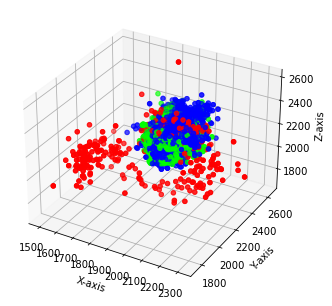

In [217]:
# try two different values for the weights argument in knn

fig = plt.figure()
ax = Axes3D(fig)

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h),np.arange(z_min, z_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #ax.pcolormesh(xx, yy, zz, cmap=cmap_light)
   

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_zlim(zz.min(), zz.max())
    # ax.title("3-Class classification (k = %i, weights = '%s')"
    #          % (n_neighbors, weights))
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

plt.show()